# European Option Pricing with big samples

## GBM

In [1]:
from src.data.make_dataset import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
# Specify the data loader parameters
n = 1000000
n_steps = 252
n_periods = n_steps/252
gbm_params = {
    "S0": 1., 
    "mu": 0.05,
    "sigma": 0.2, 
    "T": n_periods, 
    "n_points": n_steps+1, 
    "n": n
}

gbm_loader = DataLoader(method="GBM", params=gbm_params, seed=42)
paths_df = gbm_loader.create_dataset(output_type="DataFrame")

In [3]:
annualization_factor = (paths_df.shape[1]-1)/n_periods
log_returns_df = np.log(paths_df).diff(axis=1).iloc[:, 1:]
print("Input mean:\t", np.mean(paths_df.iloc[:, -1]))
print("Expected mean:\t", np.exp(0.05*n_periods))
print("-------------------------------------")
print("Ann. pat stdev:\t", log_returns_df.std(axis=1).mean()*np.sqrt(annualization_factor))
print("Exp. stdev:\t", 0.2)

Input mean:	 1.0509523760890898
Expected mean:	 1.0512710963760241
-------------------------------------
Ann. pat stdev:	 0.19981635929804403
Exp. stdev:	 0.2


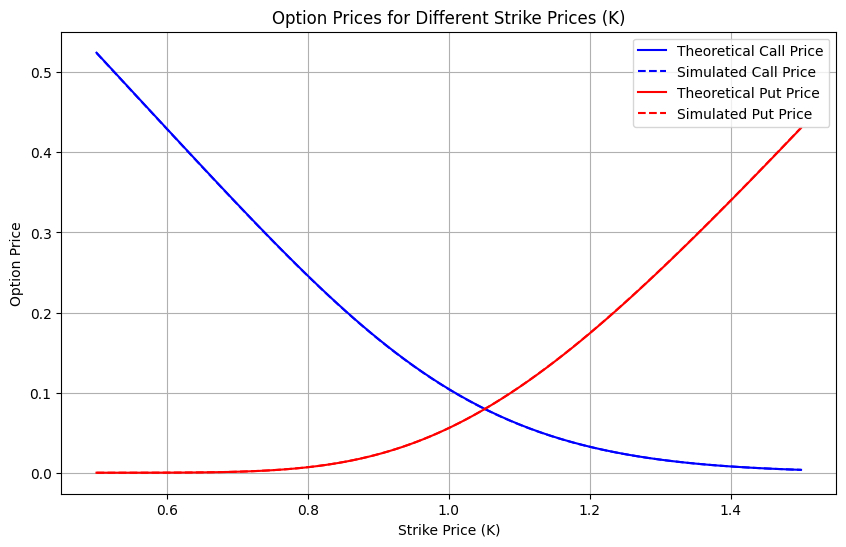

In [4]:
# Parameters
S0 = 1
r = 0.05
T = n_periods
t = 0
sigma = 0.2

# K values to loop over (fine grid from 0.1 to 2.0)
K_values = np.linspace(0.5, 1.5, 100)

# Define the functions for European call and put
europe_call = lambda x: np.maximum(x.iloc[:, -1] - K, 0)
europe_put = lambda x: np.maximum(K - x.iloc[:, -1], 0)

def exact_call_put(K):
    d1 = (np.log(S0/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    exact_call = S0*norm.cdf(d1) - K*np.exp(-r*(T-t))*norm.cdf(d2)
    exact_put = K*np.exp(-r*(T-t)) - S0 + exact_call_price
    return exact_call, exact_put

# Store results
exact_call_prices = []
exact_put_prices = []
mc_call_ul_prices = []
mc_put_ul_prices = []

for K in K_values:
    exact_call_price, exact_put_price = exact_call_put(K)

    mc_call_ul_price = np.mean(np.exp(-r*(T-t))*europe_call(paths_df))
    mc_put_ul_price = np.mean(np.exp(-r*(T-t))*europe_put(paths_df))

    exact_call_prices.append(exact_call_price)
    exact_put_prices.append(exact_put_price)
    mc_call_ul_prices.append(mc_call_ul_price)
    mc_put_ul_prices.append(mc_put_ul_price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_values, exact_call_prices, 'b', label='Theoretical Call Price')
plt.plot(K_values, mc_call_ul_prices, 'b--', label='Simulated Call Price')
plt.plot(K_values, exact_put_prices, 'r', label='Theoretical Put Price')
plt.plot(K_values, mc_put_ul_prices, 'r--', label='Simulated Put Price')

plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.title('Option Prices for Different Strike Prices (K)')
plt.legend()
plt.grid(True)
plt.show()

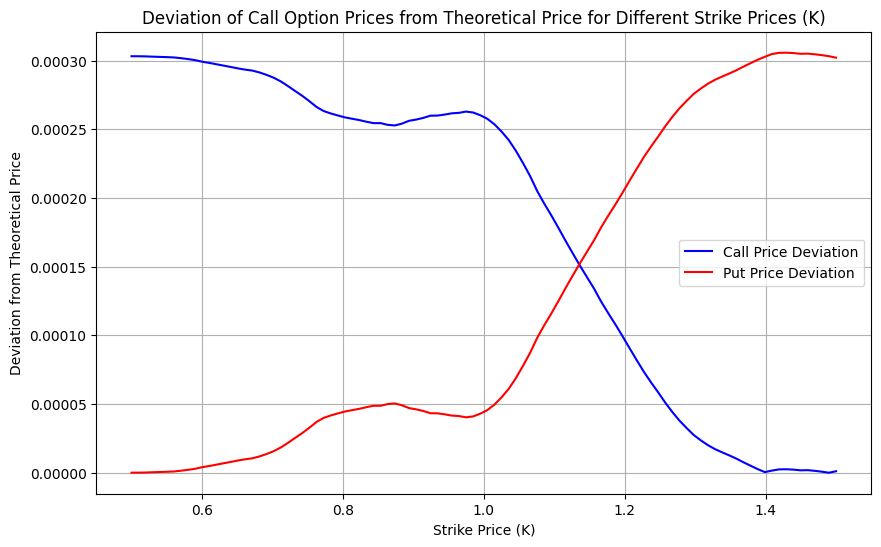

In [5]:
# K values to loop over (fine grid from 0.1 to 2.0)
K_values = np.linspace(0.5, 1.5, 100)

# Store results
ul_call_deviations = []
ul_put_deviations = []

for K in K_values:
    d1 = (np.log(S0/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)

    exact_call_price = S0*norm.cdf(d1) - K*np.exp(-r*(T-t))*norm.cdf(d2)
    exact_put_price = K*np.exp(-r*(T-t)) - S0 + exact_call_price

    mc_call_ul_price = np.mean(np.exp(-r*(T-t))*europe_call(paths_df.iloc[:, -1]))
    mc_put_ul_price = np.mean(np.exp(-r*(T-t))*europe_put(paths_df.iloc[:, -1]))

    ul_call_deviations.append(abs(mc_call_ul_price - exact_call_price))
    ul_put_deviations.append(abs(mc_put_ul_price - exact_put_price))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_values, ul_call_deviations, 'b' ,label='Call Price Deviation')
plt.plot(K_values, ul_put_deviations, 'r',label='Put Price Deviation')

plt.xlabel('Strike Price (K)')
plt.ylabel('Deviation from Theoretical Price')
plt.title('Deviation of Call Option Prices from Theoretical Price for Different Strike Prices (K)')
plt.legend()
plt.grid(True)
plt.show()


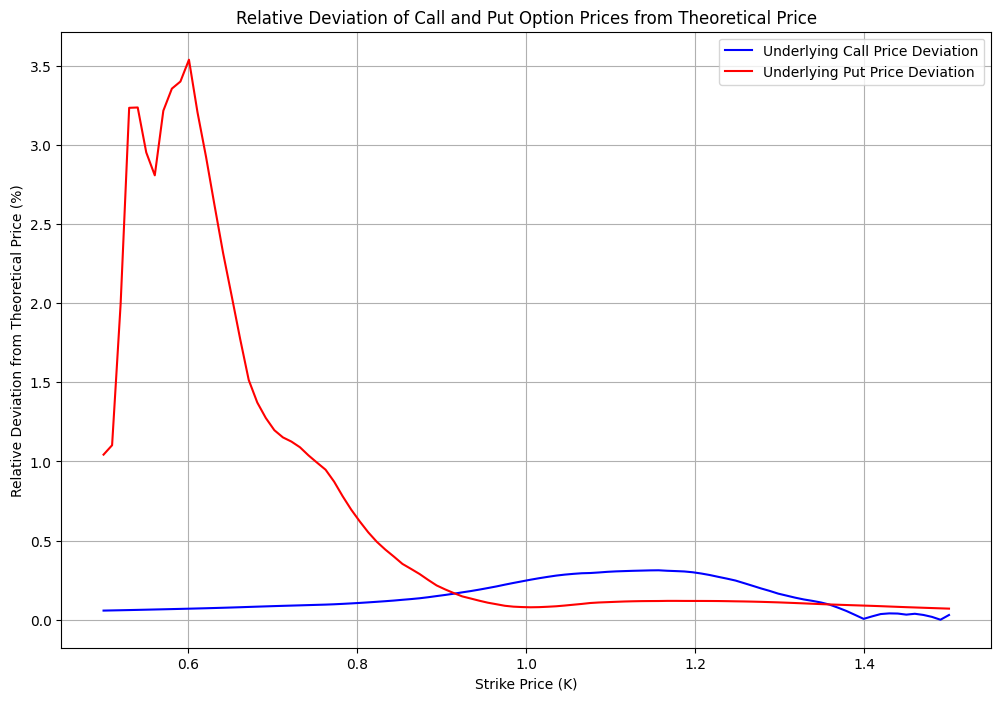

In [7]:
# K values to loop over
K_values = np.linspace(0.5, 1.5, 100)

# Store results
ul_call_deviations = []
ul_put_deviations = []

for K in K_values:
    d1 = (np.log(S0/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)

    exact_call_price = S0*norm.cdf(d1) - K*np.exp(-r*(T-t))*norm.cdf(d2)
    exact_put_price = K*np.exp(-r*(T-t)) - S0 + exact_call_price

    mc_call_ul_price = np.mean(np.exp(-r*(T-t))*europe_call(paths_df.iloc[:, -1]))
    mc_put_ul_price = np.mean(np.exp(-r*(T-t))*europe_put(paths_df.iloc[:, -1]))

    ul_call_deviation = abs(mc_call_ul_price - exact_call_price) / exact_call_price * 100
    ul_put_deviation = abs(mc_put_ul_price - exact_put_price) / exact_put_price * 100

    ul_call_deviations.append(ul_call_deviation)
    ul_put_deviations.append(ul_put_deviation)

# Plot the results
plt.figure(figsize=(12, 8))

plt.plot(K_values, ul_call_deviations, 'b', label='Underlying Call Price Deviation')
plt.plot(K_values, ul_put_deviations, 'r', label='Underlying Put Price Deviation')

plt.xlabel('Strike Price (K)')
plt.ylabel('Relative Deviation from Theoretical Price (%)')
plt.title('Relative Deviation of Call and Put Option Prices from Theoretical Price')
plt.legend()
plt.grid(True)
plt.show()